Notebook from this talk: https://www.youtube.com/watch?v=7fsreJMy_pI
<br>Code is from the talk
<br>Talk was about a previous version of the package, so I updated it (and tried to note for clarification) where I changed things

In [ ]:
%reload_ext watermark
%watermark -p pandas,networkx,numpy,matplotlib -v -n

In [85]:
%reload_ext watermark
%watermark -p pandas,networkx,numpy,matplotlib -v -n

hi


# Creating Graphs in NetworkX

- Creating a graph object
- Adding nodes and edges
- Adding attributes
- Loading in several data types

In [3]:
import csv

import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [73]:
# Using the graph constructor to create an empty graph stored as G
G = nx.Graph()


In [74]:
# Adding nodes
#Either one at a time, here a node named "1"
G.add_node(1)
#More than one at a time
G.add_nodes_from([2, 3])
G.add_node(4)

In [75]:
G.nodes()

NodeView((1, 2, 3, 4))

⚠️  
**Note**: In `networkx 2.0`, several methods now return iterators

For more details see: https://networkx.github.io/documentation/development/reference/migration_guide_from_1.x_to_2.0.html

In [76]:
# adding an edge to the graph
# listing the nodes I want connected with the edge

G.add_edge(1, 2)

In [77]:
# get graph info
#string with basic info
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 1
Average degree:   0.5000


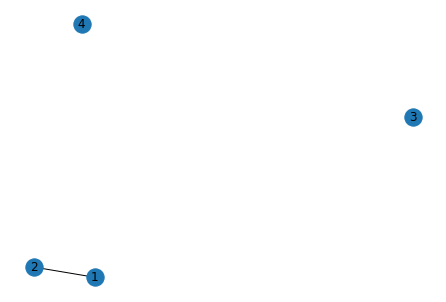

In [78]:
nx.draw(G, with_labels=True)

## Adding and Inspecting Attributes

In [83]:
# add new attributes at creation
# Adding a single new node with a favorite_color attribute
G.add_node(5, favorite_color='blue')
#Adding a few new nodes with an attribute by passing a list
G.add_nodes_from([(6, {'favorite_color' : 'red'}),
                  (7, {'favorite_color' :'purple'})])

# Adding an attribute to an edge at its creation
# talk says to use the code
#G.add_edge(5, 6, {'relationship' : 'best friends'})
#it throws an error, but this works:
G.add_edge(5, 6, relationship = 'best friends')

In [84]:
# accessing node attributes
#here accessing the attributes of node 5
#talk says to use the code
#print("Node 5 attributes:", G.node[5])
#but the current package version requires it to be 'nodes' and not 'node'
print("Node 5 attributes:", G.nodes[5])

# accessing edge attributes
# talk says to use the code
#print("Edge 5-6 attributes:", G.edge[5], [6])
#it throws an error, but this works:
print("Edge 5-6 attributes:", G.edges(5, 6))
#However it doesn't add the attribute data
#to get that we need
print("Edge 5-6 attributes:", G.get_edge_data(5, 6))

Node 5 attributes: {'favorite_color': 'blue'}
Edge 5-6 attributes: [(5, 6, None)]
Edge 5-6 attributes: {'relationship': 'best friends'}


### Adding Attributes for each existing node

In [86]:
#Adding information to the network with an attribute dictionary
#Key is node label
#attribute is the value that we want to add to that node
favorite_foods = {
    1 : 'pizza',
    2 : 'mac and cheese',
    3 : 'balogna sandwich',
    4 : 'pizza',
    5 : 'chocolate',
    6 : 'pizza',
    7 : 'bananas'
}

In [88]:
#Passing the name of the graph, the name of the dictionary where the attributes live, and what we want to call that attribute that we're passing to the nodes
#Past version was graph name, desired attribute name, dictionary name
#nx.set_node_attributes(G, 'favorite_food', favorite_foods)
nx.set_node_attributes(G, favorite_foods, 'favorite_food')

In [90]:
#Previous version was G.node, current version is G.nodes
print("Node 4's favorite food is %s" % G.nodes[4]['favorite_food'])

Node 4's favorite food is pizza


## Reading in Different Representations of Graphs
Data for graphs and networks comes in many different representations.

__Representations__:
- Edge List
- Adjacency Matrix
- Adjacency List (not covered)
- Incidence Matrix (not covered)

__Note__: Representations are related to, but distinct from, the storage format. In our examples, we'll be loading our data from text files. You may also have network data stored as `JSON`, `GEXF`, or other formats. For more details, [check the docs](http://networkx.readthedocs.io/en/latest/reference/readwrite.html).

### Grey's Anatomy Dataset
![greys anatomy](http://www.netflixupdate.com/wp-content/uploads/2015/08/Greys-Anatomy-on-Netflix.jpg)

The dataset we'll look at is a record of all "romantic" encounters between characters on the TV show Grey's Anatomy.

### Edge Lists

An edge list is a common way of representing a graph. This representation can be thought of as a list of tuples, where each tuple represents an edge between two of the nodes in your graph. The nodes of the graph can be inferred by taking the set of objects from all tuples.

You can infer/determine whether a graph is directed or weighted from an edge list.
- __Weighted__: If edges appear more than once, or if an additional weight attribute is added as a 3rd column, the graph is weighted
- __Directed__: If the "From" and "To" (often seen as "Source" and "Target") of an edge in the list is not arbitrary, it's a directed graph

In [95]:
# what does it look like? 
#my data are in the same folder as my notebook
#got the data from the github of the talk that they mention at the beginning of the video
!head ga_edgelist.csv

"from","to"
"lexi","sloan"
"lexi","karev"
"owen","yang"
"owen","altman"
"sloan","torres"
"sloan","altman"
"torres","arizona"
"torres","karev"
"derek","grey"


In [96]:
#reading the data in with the csv library
#skipping the header row with next() 
#since it's just 'from' and 'to'
#and we obviously don't want those as nodes in our graph
#making a list out of all the edges
edges = []
with open('ga_edgelist.csv', 'r') as f:
    filereader = csv.reader(f, delimiter=",", quotechar='"')
    next(filereader) # skips header row
    for row in filereader:
            edges.append(row)

In [108]:
#examining the first 5 edges
edges[0:5]

[['lexi', 'sloan'],
 ['lexi', 'karev'],
 ['owen', 'yang'],
 ['owen', 'altman'],
 ['sloan', 'torres']]

In [109]:
#creating a graph object from the edgelist
GA = nx.from_edgelist(edges)

In [110]:
print(nx.info(GA))
#average degree is average number of partners
#which I assume is the same as average number of connections

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


### Mediating Data Processing through `pandas`

Often times the data we'll want to use will probably be analyzed beforehand with `pandas`. Reading in our data to a `DataFrame` first saves us a bit of time writng code to open the files due to `read_csv` having sensible defaults around quoted characters and header rows.

In [111]:
#We can skip the header row if we just import the data into python
#and massage it there with something like pandas
#reading the csv into a pandas dataframe
ga_edges = pd.read_csv('ga_edgelist.csv')

ga_edges.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


In [112]:
#when creating a graph object from a pandas dataframe
#Passing the method the data frame name, and the source--the starting node, and target--the ending node
#Here the graph is undirected, so it doesn't really matter
#But it would matter if the graph was directed
#video says to use from_pandas_dataframe
#but this was changed to from_pandas_edgelist in the package's newer version
GA = nx.from_pandas_edgelist(ga_edges, source="from", target="to")


In [113]:
# validate info

print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


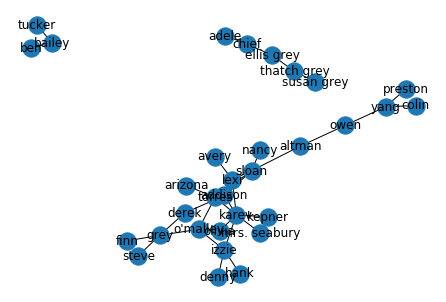

In [114]:
nx.draw(GA, with_labels=True)

### Adjacency Matrices

Another common way of representing graph data is through an `adjacency matrix` -- often referred to mathematically as `A`. This data structure is a square, `n x n` matrix where `n = number of nodes`. Each column and row in the matrix is a node. For any two nodes, `i` and `j` the value at `Aij` (row `i` and column `j`) represents the weight of the edge between nodes `i` and `j`.

<br>If the graph is unweighted and undirected, then you just have a value of 1. <br>nx can tell from the matrix if it's two identical triangles with 0s and 1s that it's an unweighted and undirected graph, and won't duplicate connections, even though every connection is represented twice, because Aij and Aji will be identical.

In [125]:
ga_adj = pd.read_csv('ga_adj.csv', index_col=0)

#video uses ix instead of iloc, which is currently depreciated
ga_adj.iloc[0:5, 0:5]

,denny,kepner,grey,colin,finn
denny,0.0,0.0,0.0,0.0,0.0
kepner,0.0,0.0,0.0,0.0,0.0
grey,0.0,0.0,0.0,0.0,1.0
colin,0.0,0.0,0.0,0.0,0.0
finn,0.0,0.0,1.0,0.0,0.0


In [127]:
#converting the dataframe to a numpy matrix with the values contained in it 
#and then creating a graph from that matrix
GAAdj = nx.from_numpy_matrix(ga_adj.values)

In [25]:
# Numpy matrices don't have labels :(
#this leads to a matrix without lables with just rows and columns
#as we can see from the print out of the nodes
print(GAAdj.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [128]:
#to deal with not having labels we'll create a label mapping
#we're creating attributes that are the node labels
#so that we can refer to the labels by a name
#we do this by combinig the nodes from this matrix with the column names from the original data frame with zip
#we then create a dictionary out of them
#which will have the current numbers index as the key
#and the name labels from the dataframe as the values
label_mapping = dict(zip(GAAdj.nodes(), ga_adj.columns))
#we're going to pass the dictionary to relable the nodes in the current graph
GAAdj = nx.relabel_nodes(GAAdj, label_mapping)

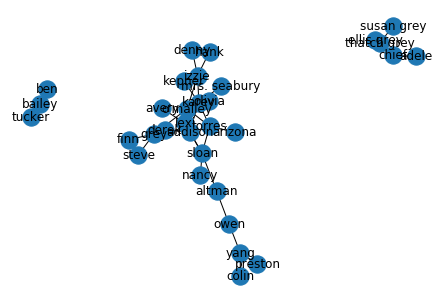

In [129]:
nx.draw_spring(GAAdj, with_labels=True)

#### Are the two graphs the same? 

In [130]:
# Easiest, least robust way to see whether the two graphs are the same:
print("Edge List Graph\n", nx.info(GA))
print("\nAdj. Matrix Graph\n", nx.info(GAAdj))

Edge List Graph
 Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250

Adj. Matrix Graph
 Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


In [131]:
# Fancy math way that checks additional conditions
#like if all the same nodes are connected and the edges are the same
print("Isomorphic?", nx.is_isomorphic(GA, GAAdj))

Isomorphic? True


### Gotchas

In [132]:
#If we want to print out the edges of a node, say 'denny'
#we can call it using the dictionary notation
#with the graph name as the dictionary, and node name in []
#If you call it from adjaceny matrix though it will also display the weight
print("'denny' From Edge List Graph:", GA['denny'])
print("'denny' From Adjacency Matrix Graph:", GAAdj['denny'])

'denny' From Edge List Graph: {'izzie': {}}
'denny' From Adjacency Matrix Graph: {'izzie': {'weight': 1.0}}


⚠️ __Observation__: Edge weights are inferred from adjacency matrix

In [133]:
#source and target are ambiguously defined in an undirected graph
#we can test that these are different by converting the graph to an edgelist
#graphs are the same, but it doesn't mean that the edgelists are
#we're sorting the edgelists by the first column
#which is the edgelist's source
original_edgelist = sorted(nx.to_edgelist(GA))
adjacency_edgelist = sorted(nx.to_edgelist(GAAdj))
#go through each of those sorted lists
#if the source is different between the two sorted lists point the mismatch out
#we can see that the egelists didn't have everyone in the same order as the source because 
#they put that source as the target since it doesn't really matter
for i, edge in enumerate(original_edgelist):
    adjacency_edge = adjacency_edgelist[i]
    if edge[0] != adjacency_edge[0]:
        print("Sorted Edge Mismatch at edge %s:" % i, edge, adjacency_edge)
        break

Sorted Edge Mismatch at edge 0: ('bailey', 'ben', {}) ('adele', 'chief', {'weight': 1.0})


⚠️  __Observation__: Source and Target are ambiguously defined in undirected graphs

### Exporting Graphs
We'll export the graph in `GEXF` (Graph Exchange XML Format).

In [134]:
nx.write_gexf(GA, 'ga_graph.gexf')

In [144]:
# apply the dead_or_alive mapping of desceased characters as a death attribute we'll call status
#as before, with the new package this won't work because of the ordering nx.set_node_attributes(GA, 'status', dead_or_alive)
nx.set_node_attributes(GA, dead_or_alive, 'status')

# Visualizing Graphs

- Basic NetworkX & Matplotlib (`nx.draw`)
- Detailed Plotting w/ Networkx & Matplotlib
    - Plotting attributes
    
<center><img src="https://i2.wp.com/flowingdata.com/wp-content/uploads/2015/07/Disney-strategy-chart-from-1957.jpg" width="540"></center>

Vizualizing networks is a complicated problem -- how do you position the nodes and edges in a way such that no nodes overlap, connected nodes are near each other, none of the labels overlap? Typically we use what is called a *layout* to plot or visualize networks. A layout is an algorithm used to position nodes and edges on a plot automatically in aesthetically and informationally satisfactory ways.

There are several different layout algorithms, but the most common is a *force-directed* layout. These layout algorithms are based off of physical repulsion and spring systems. In general, the rule for force-directed layouts is: repel all nodes, and model connections between nodes as 'springs', with the result that more connected nodes will be closer together.

One important issue is that each layout typically has random initial conditions. Running a plot function twice will return two different plots, both following the rules of the algorithm, but differing due to the initial conditions of the layout.

In [135]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
#reading in the graph file
#(the same one that we exported above)
GA = nx.read_gexf('ga_graph.gexf')
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


## NetworkX with Matplotlib

Pros:
- Easy
- Some customization

Cons:
- Looks "dated" (not great for publication / productizing)
- Not interactive
- Few Layout Options

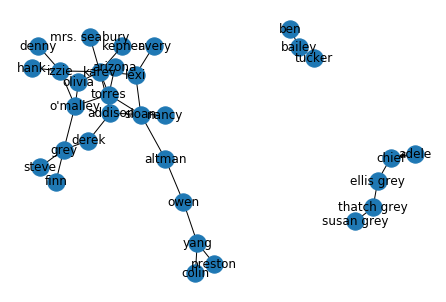

In [138]:
# Easiest Way
nx.draw(GA, with_labels=True)
#with larger graphs the text will probably get in the way
#so we'll likely want to turn it off

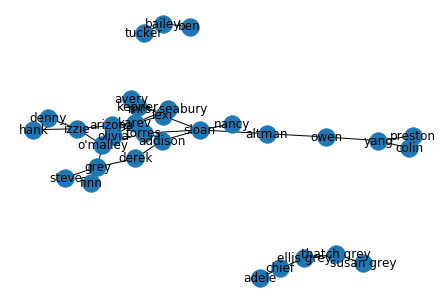

In [139]:
# Graph Layouts are random...
#this is why rerunning the same code and data twice
#leads to graphs that look different even though they all follow the same rules
#does make replication harder with these algorithms
nx.draw(GA, with_labels=True)

## NetworkX Detailed Plotting

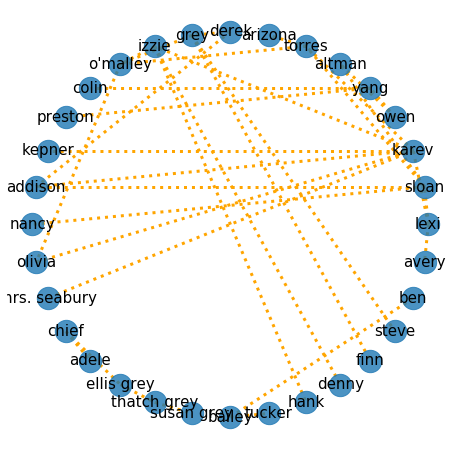

In [140]:
# Some matplotlib options
#increasing the figure size 
#and turning the axes off because
#we don't care about the coordinates of the nodes;
#how they're laid out
plt.figure(figsize=(8,8))
plt.axis('off')

#if you don't use a plain draw function
# generate the layout and place nodes and edges and save it
#because we then build upon it by adding different layers
layout = nx.circular_layout(GA)

# plot nodes, labels, and edges with options
#passing the graph, the positioning, increasing the node size, 
#and adding a transparency alpha to the nodes
nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
#now plotting the edges
nx.draw_networkx_edges(GA, pos=layout, width=3, style='dotted',
                       edge_color='orange')
#drawing the labels
nx.draw_networkx_labels(GA, pos=layout, font_size=15)
#showing the plot
plt.show()
#you lose a lot of information about the layout and connections of the graph when plotting this way
#doesn't prevent overlapping options

## Detailed Plotting with Colors by Attribute

In [141]:
from seaborn import color_palette, set_style, palplot

In [142]:
#where are the dead people in the show
#are characters with a lot of connections often getting written out?
dead_or_alive = {
    'karev' : 'alive',
    'hank' : 'alive',
    'izzie' : 'alive',
    'mrs. seabury' : 'alive',
    'ben' : 'alive',
    'grey' : 'alive',
    'sloan' : 'dead',
    'steve' : 'alive',
    'kepner' : 'alive',
    'colin' : 'alive',
    'avery' : 'alive',
    'bailey' : 'alive',
    'chief' : 'alive',
    'preston' : 'alive',
    'ellis grey' : 'dead',
    "o'malley" : 'dead',
    'lexi' : 'dead',
    'torres' : 'alive',
    'yang' : 'alive',
    'addison' : 'alive',
    'olivia' : 'alive',
    'altman' : 'alive',
    'denny' : 'dead',
    'arizona' : 'alive',
    'adele' : 'dead',
    'derek' : 'dead',
    'nancy' : 'alive',
    'thatch grey' : 'alive',
    'susan grey' : 'dead',
    'owen' : 'alive',
    'tucker' : 'alive',
    'finn' : 'alive'
}

![spoiler alert](http://funnyand.com/wp-content/uploads/2014/09/Spoiler-Alert.jpg)
``` python
dead_or_alive = {
    'karev' : 'alive',
    'hank' : 'alive',
    'sloan' : 'dead',
    ...
    'finn' : 'alive'
    }
``` 

In [145]:
#mapping the dead_or_alive dictionary onto the graph as an attribute named status for each node

nx.set_node_attributes(GA, dead_or_alive, 'status')

In [166]:
palette

['#0173b2', '#de8f05']

In [163]:
#for plotting networkx expects a list of hex colors that match up to 
#the ordered set of nodes that we're dealing with

#take in the graph and the attribute that you care about in the graph
def create_color_map(G, attribute, seaborn_palette="colorblind"):
    """Return a list of hex color mappings for node attributes"""
    #creates a list of just the alive/dead statuses 
    attributes = [G.nodes[label][attribute] for label in G.nodes()]

    # get the set of possible attributes
    #i.e. the unique values in the list of desired attributes
    attributes_unique = list(set(attributes))
    #count the number of those attributes
    num_values = len(attributes_unique)

    # generate color palette from seaborn with the number of 
    #colors the same as the number of unique attributes 
    #here it's two because we have only dead or alive
    palette = color_palette(seaborn_palette, num_values).as_hex()

    # create a mapping of attribute to color
    #by zipping together the two colors with the two unique attributes
    #and creating a dictionary out of that
    #with the hex code as the value for each status type key
    color_map = dict(zip(attributes_unique, palette))

    # map the attribute for each node to the color it represents
    node_colors = [color_map[attribute] for attribute in attributes]

    return node_colors, color_map, palette

In [164]:
node_colors, color_map, palette = create_color_map(GA, 'status')

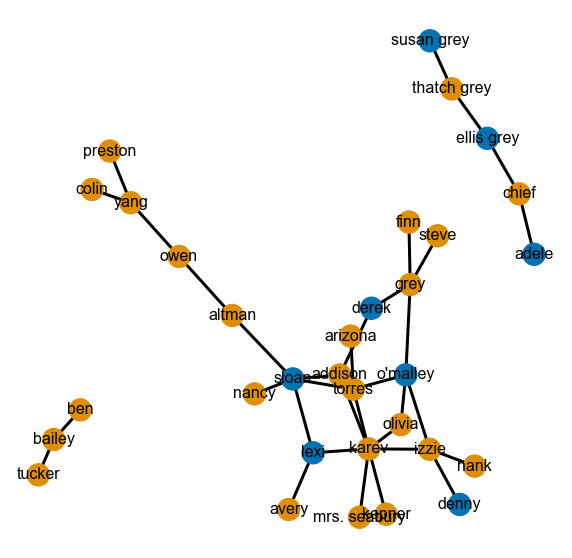

{'dead': '#0173b2', 'alive': '#de8f05'}


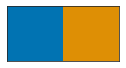

In [167]:
set_style('white')
plt.figure(figsize=(10,10))
plt.axis('off')

layout = nx.spring_layout(GA)
#passing the node colors that we selected above
#in the helper function
nx.draw_networkx_nodes(GA, layout, node_color=node_colors, node_size=500)
nx.draw_networkx_labels(GA, pos=layout, font_size=16)
nx.draw_networkx_edges(GA, layout, width=3)

plt.show()

# legend
print(color_map)
palplot(palette)

## Other Visualization Options
- [Plot.ly](https://plot.ly/ipython-notebooks/network-graphs/#)
- [d3](https://bl.ocks.org/mbostock/4062045)
- [Gephi](https://gephi.org/)
- [Cytoscape / cyREST](https://github.com/idekerlab/vizbi-2015)
- [python-igraph](http://igraph.org/python/)

# Centrality

- Definition of Centrality
- Compare and contrast popular centrality measures on dataset
    - Degree
    - Closeness
    - Betweenness
    - Eigenvector

<img width="500" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Graph_betweenness.svg/2000px-Graph_betweenness.svg.png">

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
GA = nx.read_gexf('../data/ga_graph.gexf')

## Degree Centrality

The __degree__ of a node is the number of other nodes to which it is connected. 

![](https://www.openabm.org/files/books/1928/fig102.png)

NetworkX's degree centrality is calculated by taking the degree of the node and dividing by `n-1` where where `n` is the number of nodes in `G`.

$$ {C_D (u)} = \frac{deg(u)}{{n-1}} $$

⚠️ __NOTE__: `In a directed graph, both in-degree and out-degree centrality can be calculated.`

Let's find the degree of our main character `Grey`.

In [3]:
GA.degree("grey")

4

Likewise, we can find the degree of each cast member.

In [4]:
# See all of them (ok on this small graph)
GA.degree()

{'addison': 3,
 'adele': 1,
 'altman': 2,
 'arizona': 1,
 'avery': 1,
 'bailey': 2,
 'ben': 1,
 'chief': 2,
 'colin': 1,
 'denny': 1,
 'derek': 2,
 'ellis grey': 2,
 'finn': 1,
 'grey': 4,
 'hank': 1,
 'izzie': 4,
 'karev': 7,
 'kepner': 1,
 'lexi': 3,
 'mrs. seabury': 1,
 'nancy': 1,
 "o'malley": 4,
 'olivia': 2,
 'owen': 2,
 'preston': 1,
 'sloan': 5,
 'steve': 1,
 'susan grey': 1,
 'thatch grey': 2,
 'torres': 4,
 'tucker': 1,
 'yang': 3}

In [5]:
# Here's the top 5.
sorted(GA.degree().items(), key=lambda x:x[1], reverse=True)[:5]

[('karev', 7), ('sloan', 5), ('grey', 4), ("o'malley", 4), ('izzie', 4)]

While knowing the raw number is great, most centrality measures are _normalized_ between zero and one so that they can be more easily compared to one another.

For the **degree centrality** measure, the normalized interpretion is really intuitive:  

> _What percentage of nodes is this node connected to?_

Or for our Grey's Anatomy example: 

> _What percentage of the cast has this character been invovled with?_




Let's calculate the degree centrality for `Grey`.

In [6]:
# Degree for the 'Grey' node
degree_grey = GA.degree("grey")  # 4 romantic partners

# Total number of nodes (excluding Grey) 
total_nodes_minus_grey = len(GA.nodes())-1  # 31 characters in the cast, excluding Grey

# Degree centrality for Grey
degree_centrality_grey = (degree_grey / total_nodes_minus_grey)
print("Calculated degree centrality for Grey:", degree_centrality_grey)

# Double check
print("Networkx degree centrality for Grey:", nx.degree_centrality(GA)["grey"])

def check_equal(val1, val2):
    assert (val1 == val2),"Centrality measure calculated incorrectly!"
    return "Values match, good job!"

check_equal(degree_centrality_grey, nx.degree_centrality(GA)["grey"])

Calculated degree centrality for Grey: 0.12903225806451613
Networkx degree centrality for Grey: 0.12903225806451613


'Values match, good job!'

Likewise, let's find the degree centrality for all characters.

In [7]:
degree_centrality = nx.degree_centrality(GA)
degree_centrality

{'addison': 0.0967741935483871,
 'adele': 0.03225806451612903,
 'altman': 0.06451612903225806,
 'arizona': 0.03225806451612903,
 'avery': 0.03225806451612903,
 'bailey': 0.06451612903225806,
 'ben': 0.03225806451612903,
 'chief': 0.06451612903225806,
 'colin': 0.03225806451612903,
 'denny': 0.03225806451612903,
 'derek': 0.06451612903225806,
 'ellis grey': 0.06451612903225806,
 'finn': 0.03225806451612903,
 'grey': 0.12903225806451613,
 'hank': 0.03225806451612903,
 'izzie': 0.12903225806451613,
 'karev': 0.22580645161290322,
 'kepner': 0.03225806451612903,
 'lexi': 0.0967741935483871,
 'mrs. seabury': 0.03225806451612903,
 'nancy': 0.03225806451612903,
 "o'malley": 0.12903225806451613,
 'olivia': 0.06451612903225806,
 'owen': 0.06451612903225806,
 'preston': 0.03225806451612903,
 'sloan': 0.16129032258064516,
 'steve': 0.03225806451612903,
 'susan grey': 0.03225806451612903,
 'thatch grey': 0.06451612903225806,
 'torres': 0.12903225806451613,
 'tucker': 0.03225806451612903,
 'yang': 0

In [8]:
# Top 5.  Percent of cast this character has been with.
sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('karev', 0.22580645161290322),
 ('sloan', 0.16129032258064516),
 ('grey', 0.12903225806451613),
 ("o'malley", 0.12903225806451613),
 ('izzie', 0.12903225806451613)]

In [9]:
# Top 5.  Total # of partners this character has been with.
sorted(GA.degree().items(), key=lambda x: x[1], reverse=True)[:5]

[('karev', 7), ('sloan', 5), ('grey', 4), ("o'malley", 4), ('izzie', 4)]

In [10]:
# apply measurements back to Graph
nx.set_node_attributes(GA, 'degree centrality', degree_centrality)

In [11]:
GA.node['karev']

{'degree centrality': 0.22580645161290322, 'label': 'karev'}

## Closeness Centrality
Closeness Centrality measures how many "hops" it would take to reach every other node in a network (taking the shortest path). It can be informally thought as 'average distance' to all other nodes.

<img style="float: center" src="https://toreopsahl.files.wordpress.com/2008/12/geodesic-n1.png?w=455">

In NetworkX, it the reciporical of of the *average* value, which normalizes the value in a 0 to 1 range. 

$$ C_C (u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)} $$

If you again take the reciporical of this, you'll find the *average* distance to all other nodes.


⚠️ __NOTE__: `If the graph is not completely connected, this algorithm computes the closeness centrality for each connected part separately.  The closeness centrality is normalized to (n-1)/(|G|-1) where n is the number of nodes in the connected part of graph containing the node.` [[Source](https://networkx.github.io/documentation/development/_modules/networkx/algorithms/centrality/closeness.html)]

__Why should we care about closeness centrality?__

> Degree centrality measures might be criticized because they only take into account the immediate ties that an actor has, or the ties of the actor's neighbors, rather than indirect ties to all others. One actor might be tied to a large number of others, but those others might be rather disconnected from the network as a whole. In a case like this, the actor could be quite central, but only in a local neighborhood. [[Source](http://www.faculty.ucr.edu/~hanneman/nettext/C10_Centrality.html#Closeness)]

In our example, closeness centrality could perhaps help us understand which characters have the greatest potential to spread an infectous disease or STD across the cast (an admittedly dark plot arc).

Let's calculate the closeness centrality for `Grey`.  First we'll start by getting the shortest paths between `Grey` and all other characters.

In [12]:
# Shortest path between Grey and other characters
grey_shortest_path = nx.shortest_path_length(GA)['grey']
grey_shortest_path

{'addison': 2,
 'altman': 4,
 'arizona': 3,
 'avery': 5,
 'colin': 7,
 'denny': 3,
 'derek': 1,
 'finn': 1,
 'grey': 0,
 'hank': 3,
 'izzie': 2,
 'karev': 3,
 'kepner': 4,
 'lexi': 4,
 'mrs. seabury': 4,
 'nancy': 4,
 "o'malley": 1,
 'olivia': 2,
 'owen': 5,
 'preston': 7,
 'sloan': 3,
 'steve': 1,
 'torres': 2,
 'yang': 6}

In [13]:
# Sum of the shortest paths to all other characters
grey_sum_shortest_path = sum(grey_shortest_path.values())  # 77

# Closeness centrality for Grey
closeness_centrality_grey = (total_nodes_minus_grey / grey_sum_shortest_path)
print("Calculated closeness centrality for Grey:", closeness_centrality_grey)

# Double check
print("Networkx closeness centrality for Grey:", nx.closeness_centrality(GA)["grey"])

check_equal(closeness_centrality_grey, nx.closeness_centrality(GA)["grey"])

Calculated closeness centrality for Grey: 0.4025974025974026
Networkx closeness centrality for Grey: 0.2216170925848345


AssertionError: Centrality measure calculated incorrectly!

Interesting...our calculated measure is not the same as the one in NetworkX.  

_What happened here?_

This error occured because __the character relationship graph is not fully connected.__ (i.e., there are groups of characters that do not have relationships with one another).

In [14]:
# View members of different subgraphs
sorted(nx.connected_components(GA), key = len, reverse=True)

[{'addison',
  'altman',
  'arizona',
  'avery',
  'colin',
  'denny',
  'derek',
  'finn',
  'grey',
  'hank',
  'izzie',
  'karev',
  'kepner',
  'lexi',
  'mrs. seabury',
  'nancy',
  "o'malley",
  'olivia',
  'owen',
  'preston',
  'sloan',
  'steve',
  'torres',
  'yang'},
 {'adele', 'chief', 'ellis grey', 'susan grey', 'thatch grey'},
 {'bailey', 'ben', 'tucker'}]

To correct for this, we will use the number of nodes in the `Grey` subgraph instead of the total number of nodes to calculated degree centrality.  Additionally, we'll normalized to `(n-1)/(|G|-1)` where `n` is the number of nodes in the connected part of graph containing the node.

In [15]:
# Number of nodes in Grey subgraph, excluding Grey
total_nodes_minus_grey_sub = len(grey_shortest_path)-1   # 23

# Closeness centrality for Grey (unnormalized)
closeness_centrality_grey = (total_nodes_minus_grey_sub / grey_sum_shortest_path)   # ~0.2987

# Closeness centrality for Grey (normalized)
closeness_centrality_grey_normalized = closeness_centrality_grey * (total_nodes_minus_grey_sub/total_nodes_minus_grey)
print("Calculated closeness centrality for Grey (normalized):", closeness_centrality_grey_normalized)

# Double check
print("Networkx closeness centrality for Grey:", nx.closeness_centrality(GA)["grey"])

check_equal(closeness_centrality_grey_normalized, nx.closeness_centrality(GA)["grey"])

Calculated closeness centrality for Grey (normalized): 0.2216170925848345
Networkx closeness centrality for Grey: 0.2216170925848345


'Values match, good job!'

Let's find the closeness centrality for all characters.

In [16]:
closeness_centrality = nx.closeness_centrality(GA)
closeness_centrality

{'addison': 0.2892290869327502,
 'adele': 0.05161290322580645,
 'altman': 0.2337604949182501,
 'arizona': 0.21600653327888933,
 'avery': 0.19614386355209493,
 'bailey': 0.06451612903225806,
 'ben': 0.04301075268817204,
 'chief': 0.07373271889400922,
 'colin': 0.13228307076769194,
 'denny': 0.18752215526409075,
 'derek': 0.2337604949182501,
 'ellis grey': 0.08602150537634408,
 'finn': 0.17236884978820463,
 'grey': 0.2216170925848345,
 'hank': 0.18752215526409075,
 'izzie': 0.24731182795698925,
 'karev': 0.2892290869327502,
 'kepner': 0.21067303863002787,
 'lexi': 0.26253101736972706,
 'mrs. seabury': 0.21067303863002787,
 'nancy': 0.21067303863002787,
 "o'malley": 0.2708653353814644,
 'olivia': 0.2337604949182501,
 'owen': 0.19173613628126135,
 'preston': 0.13228307076769194,
 'sloan': 0.2892290869327502,
 'steve': 0.17236884978820463,
 'susan grey': 0.05161290322580645,
 'thatch grey': 0.07373271889400922,
 'torres': 0.29937747594793435,
 'tucker': 0.04301075268817204,
 'yang': 0.15948

In [17]:
# top 5
sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('torres', 0.29937747594793435),
 ('sloan', 0.2892290869327502),
 ('addison', 0.2892290869327502),
 ('karev', 0.2892290869327502),
 ("o'malley", 0.2708653353814644)]

In [18]:
# apply measurements back to Graph
nx.set_node_attributes(GA, 'closeness centrality', closeness_centrality)

In [19]:
# average distance of torres:
1 / closeness_centrality['torres']

3.340264650283554

In [20]:
7/(len(GA.nodes()) - 1)

0.22580645161290322

## Betweeness Centrality

Betweenness centrality quantifies the number of times a node acts as a bridge (or "broker") along the shortest path between two other nodes.  

![](https://intl520-summer2011-mas.wikispaces.com/file/view/Simple_Network.gif/238734999/480x360/Simple_Network.gif)

In this conception, vertices that have a high probability to occur on a randomly chosen shortest path between two randomly chosen vertices have a high betweenness.

$$ C_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)} $$

where ${\sigma(s, t)}$ is total number of shortest paths from node ${s}$ to node ${t}$ and ${\sigma(s, t|v)}$ is the number of those paths that pass through ${v}$.

__Why is betweeness centrality important?__

> Suppose that I want to influence you by sending you information, or make a deal to exchange some resources. But, in order to talk to you, I must go through an intermediary. For example, let's suppose that I wanted to try to convince the Chancellor of my university to buy me a new computer. According to the rules of our bureaucratic hierarchy, I must forward my request through my department chair, a dean, and an executive vice chancellor. Each one of these people could delay the request, or even prevent my request from getting through. This gives the people who lie "between" me and the Chancellor power with respect to me... Having more than one channel makes me less dependent, and, in a sense, more powerful.  [[Source](http://www.faculty.ucr.edu/~hanneman/nettext/C10_Centrality.html#Closeness)]

While this metric seems less relevent to our particular network, let's create a hypothetical situation:

To engage with a new romantic partner, you needed permission from at least one of their former partners and you could only send your request through existing partners (_awkward_ 😬).  Betweeness centrality would tell you which actors had the most effective veto power to thwart random requests made by a member to another random member in the network.

In [21]:
betweeness_centrality = nx.betweenness_centrality(GA)
betweeness_centrality

{'addison': 0.09480286738351254,
 'adele': 0.0,
 'altman': 0.16344086021505377,
 'arizona': 0.0,
 'avery': 0.0,
 'bailey': 0.002150537634408602,
 'ben': 0.0,
 'chief': 0.0064516129032258064,
 'colin': 0.0,
 'denny': 0.0,
 'derek': 0.03860215053763442,
 'ellis grey': 0.008602150537634409,
 'finn': 0.0,
 'grey': 0.10078853046594982,
 'hank': 0.0,
 'izzie': 0.10311827956989247,
 'karev': 0.20487455197132612,
 'kepner': 0.0,
 'lexi': 0.07741935483870968,
 'mrs. seabury': 0.0,
 'nancy': 0.0,
 "o'malley": 0.11702508960573478,
 'olivia': 0.01064516129032258,
 'owen': 0.12903225806451613,
 'preston': 0.0,
 'sloan': 0.248100358422939,
 'steve': 0.0,
 'susan grey': 0.0,
 'thatch grey': 0.0064516129032258064,
 'torres': 0.14440860215053763,
 'tucker': 0.0,
 'yang': 0.09247311827956989}

In [22]:
# top 5
sorted(betweeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[('sloan', 0.248100358422939),
 ('karev', 0.20487455197132612),
 ('altman', 0.16344086021505377),
 ('torres', 0.14440860215053763),
 ('owen', 0.12903225806451613)]

## Eigenvector Centrality

A node is high in eigenvector centrality if it is connected to many other nodes who are themselves well connected. Eigenvector centrality for each node is simply calculated as the proportional eigenvector values of the eigenvector with the largest eigenvalue.

<img align="middle" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/6_centrality_measures.png/350px-6_centrality_measures.png">

_**Middle Left ("C"):** Eigenvector Centrality.  **Middle Right ("D"):** Degree Centrality_



In [23]:
eigenvector_centrality = nx.eigenvector_centrality_numpy(GA)
eigenvector_centrality

{'addison': 0.27840139594529484,
 'adele': 5.058876862528936e-17,
 'altman': 0.10442628192357334,
 'arizona': 0.10564201543690817,
 'avery': 0.07734385472828524,
 'bailey': -2.195339193913248e-16,
 'ben': -1.5057529497486453e-16,
 'chief': 4.108700022015808e-17,
 'colin': 0.0035243897348137374,
 'denny': 0.0832030185430171,
 'derek': 0.12570740328311875,
 'ellis grey': 1.969945244481185e-18,
 'finn': 0.04422017135181157,
 'grey': 0.1510783608855737,
 'hank': 0.08320301854301704,
 'izzie': 0.28426338654827654,
 'karev': 0.5027687871890412,
 'kepner': 0.14715887695313748,
 'lexi': 0.2642455341015448,
 'mrs. seabury': 0.14715887695313762,
 'nancy': 0.09444834886225349,
 "o'malley": 0.3020119709505961,
 'olivia': 0.23555685153699446,
 'owen': 0.03408964112637771,
 'preston': 0.003524389734813675,
 'sloan': 0.32268309457542504,
 'steve': 0.044220171351811575,
 'susan grey': -2.2838591730981282e-17,
 'thatch grey': -2.687699295880897e-17,
 'torres': 0.36092629324926223,
 'tucker': -1.3686099

In [24]:
max_value = max(eigenvector_centrality.items(), key=lambda x: x[1])

ec_scaled = {}
for k in eigenvector_centrality.keys():
    ec_scaled[k] = eigenvector_centrality[k] / max_value[1]

# Scaled by the most central character (karev)
sorted(ec_scaled.items(), key=lambda x:x[1], reverse=True)[0:5]

[('karev', 1.0),
 ('torres', 0.7178772876239707),
 ('sloan', 0.6418121068722911),
 ("o'malley", 0.6006975346244785),
 ('izzie', 0.5653958515157256)]

## Other Centrality Measures

* [Harmonic Centrality](https://networkx.readthedocs.io/en/latest/reference/generated/networkx.algorithms.centrality.harmonic_centrality.html)
* [Katz Centrality](https://en.wikipedia.org/wiki/Katz_centrality)
* [Game Theoretic Centrality](http://game-theoretic-centrality.com/)
